## Baseline - Queuing dynamics

Notebook where the queuing dynamics analysis are present

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('white')
from string import digits
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.style.reload_library()
plt.style.use(['science','grid']) ############## THIS ONE TO COOL EVERYTHING
import re
from IPython.display import display


### Functions for this
def organise_in_dict(string):
    trigger = False 
    open_char = '['
    close_char = ']'
    skipper = False
        
    counter = 0
    d = {}
    tmplist = ''
    for char_index in range(len(string)-1):
        
        char = string[char_index]
        next_char = string[char_index+1]

        if char == open_char and counter!=5 and skipper == False:# skipper==False:
            tmplist=''
            

        if char == open_char and counter == 5 and skipper == False:
            skipper = True
            tmplist=''
            
  
        if char != open_char and char!= close_char:
            tmplist=tmplist+char
            
        if char == close_char and skipper==False:
            d[counter] = tmplist
            counter+=1
            
        if char == close_char and next_char == close_char and skipper==True:
            skipper=False
    return d
    
    
    
## needed functions to clean the cell

def clean(string,dict_key):

    remove_digits = str.maketrans('', '', digits)

    def remove_end_spaces(string):
        return "".join(string.rstrip())

    def Convert(string):
        li = list(string.split(" "))
        return li

    def cleaning_list_locations(cell_from_dataframe,dict_key=dict_key):
        cleaning_cell = cell_from_dataframe.replace("(","").replace(")","").replace('"', "")
        if dict_key!=5:
            cleaning_cell = cleaning_cell.translate(remove_digits)

        cleaning_cell = re.sub("\s\s+", " ", cleaning_cell)
        cleaning_cell = remove_end_spaces(cleaning_cell)
        cleaning_cell = Convert(cleaning_cell)

    
        return cleaning_cell

    def replacing_nonepatch_shelter(almost_finished_list):

        for n, i in enumerate(almost_finished_list):
           if i == "none":
              almost_finished_list[n] = "shelter"
           if i == "patch":
              almost_finished_list[n] = "shelter"
            
        return almost_finished_list
    
    filtered_string = cleaning_list_locations(string)
    filtered_string = replacing_nonepatch_shelter(filtered_string)
    
    return filtered_string

def func(filename,directory_location):
    
    file_as_string = open(directory_location+filename).read()
    
    file_as_dict = organise_in_dict(file_as_string)
    
    final_dict = {}
    
    for key in file_as_dict:
        if key > 5 or key == 0:
            final_dict[key] = file_as_dict[key].split()
            pass
        else:
            final_dict[key] = clean(file_as_dict[key],dict_key=key)
        
    return final_dict

number_of_scenarios = 5
number_of_replications = 10
filenames = list()

# palettes
pal_scenarios = {0: "tab:blue", 1: "tab:orange", 2:"tab:green", 3: "tab:purple", 4:"tab:red"}
pal_attitudes = {"Cooperative": "tab:gray", "Competitive": "tab:pink", 'New-competitive':"tab:olive"}


total_dict = {}
directory_location = '/datasets/experiment0/'

for scenario in range(number_of_scenarios):  ## THIS IS WRONG EVA, DONT PUT - 1 HERE
    total_dict[scenario] = {}
    
    for replication in range(number_of_replications):
        filename = 'Ex0_Second_Policy_policy 0 (baseline)_scenario_%s_run_%s'%(scenario*10,scenario*10+1+replication)
        
        total_dict[scenario][replication] = func(filename=filename,directory_location=directory_location)
      
        
for scenario in total_dict:
    
    for replication in total_dict[scenario]:
        total_dict[scenario][replication][9] = {'cooperative':0,'competitive':0, 'new-competitive':0}
        total_dict[scenario][replication][10] = {'cooperative':0,'competitive':0, 'new-competitive':0}
        total_dict[scenario][replication][11] = {'cooperative':0,'competitive':0, 'new-competitive':0}

        counters = {'cooperative':0,'competitive':0, 'new-competitive':0}
        somearray = total_dict[scenario][replication][5]
        
        for index in range(int(len(somearray)/2)):
            total_dict[scenario][replication][9][somearray[index*2]] += float(somearray[index*2+1])
            counters[somearray[index*2]] += 1

    
        for key in total_dict[scenario][replication][9]:
            total_dict[scenario][replication][9][key]=total_dict[scenario][replication][9][key]
                
            if counters[key] != 0:
                total_dict[scenario][replication][10][key] = counters[key]
                total_dict[scenario][replication][11][key] = total_dict[scenario][replication][9][key]/counters[key]
                
                             
                                                                                                       
                                                                                                       
            
### how to turn the counter into a dictionary as well... this would probably be useful along the way.. 

location_figures = 'figures/'



### H0 - The average queuing time of all queuing agents can be positively correlated with the percentage of competitive people in a given popuolation. 

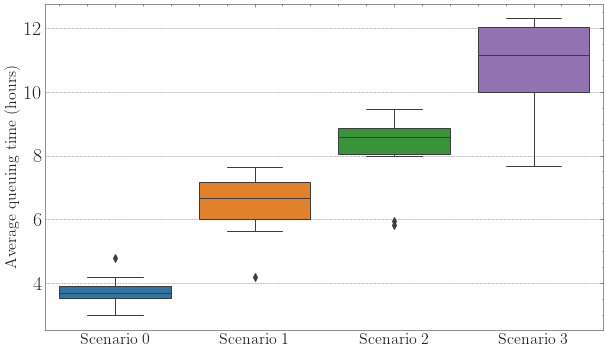

In [ ]:
# per scenario give a boxplot of the average waiting time (sum of every key of 10 / 3)
fig, ax = plt.subplots(figsize = (10, 6))
matrix = np.zeros([number_of_replications*number_of_scenarios,3])


# print(matrix)

for scenario in total_dict:
    
    # scenario = 0,1,2,3,4
    
    for replication in total_dict[scenario]:
        
        # replication = 0,1,2,3,4,
            
        matrix[number_of_replications*scenario+replication,2] = (sum(total_dict[scenario][replication][9].values())/(sum(total_dict[scenario][replication][10].values())))/60   # dividing by 60 to transform in hours
        matrix[number_of_replications*scenario+replication,0] = scenario
        matrix[number_of_replications*scenario+replication,1] = replication

matrix = pd.DataFrame(matrix,columns=["scenario","replication","avgQ"])

# taking S4 out of the image
matrix = matrix[matrix['scenario'] != 4.0]

sns.boxplot(x="scenario", y="avgQ", data=matrix, palette = pal_scenarios)
ax.set(xlabel=None)
ax.set_xticklabels(["Scenario 0", "Scenario 1", "Scenario 2", "Scenario 3"], size = 16)
#plt.xlabel("Scenario", size = 16)
plt.ylabel("Average queuing time (hours)", size = 16)
plt.yticks(fontsize=20)
#plt.title("Average queuing time across all queuing agents",fontsize=20)
plt.savefig(location_figures + "Hypothesis1.1QueuingTimeAcrossScenarios.svg")


#print(matrix)




<span style='color:green'> What kind of comments can I take from this? </span>

1. Overall, it is highly beneficial for everyone if everyone behaves cooperatively. The queuing process goes a lot quicker for everyone and it flows a lot better

2. Adding competitive agents to a population will increase the average queuing time across all agents - the more competitive people there are, the longer a person has to wait on average (not looking at their attitude)

3. It is a antisocial move to cut the late --- on average you are making everyone suffer a bit (Overall system)

4. However, it is possible to observe that, if a population is 40% competitive, the overall queuing time reduces. This represents a bit a limitation from the model... Since competitive agents are only programmed to cut the line once, the model is not fit to represent crowds that keep pushing each other. For this reason, it could be argued that this value is not very realistic 

5. verification:
---- this is not showing what i was expecting. if i introduce 40% of competitive, the model behavior diverges from the expected. (less time in queue for everyone). for this reason, i will not use values higher than 30% for the results

6. discussion
--- limitation: refer to the verfication and say that the 
--- at some point it switches from queuing to crowd control and chaos (get literature, evacuation of buildings)
--- literature about chaos and how it emerges and how it differs from normal queuing
--- this could be changed by implementin

### H1 People with a competitive attitude on average spend less time in a queue than people with a cooperative attitude

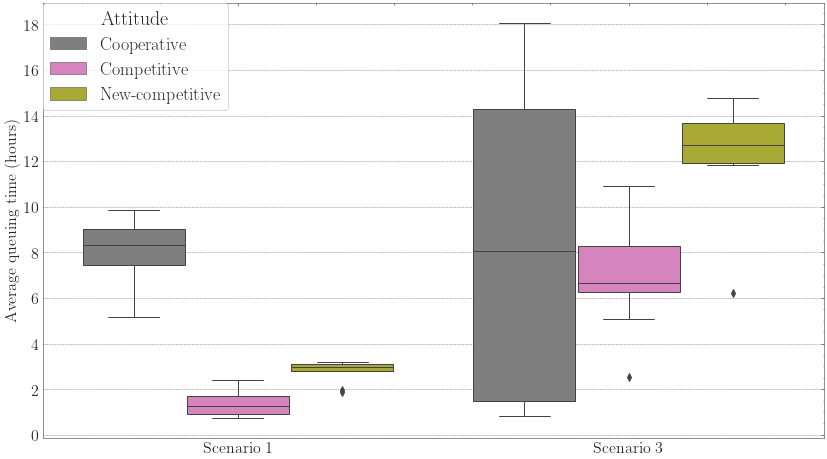

In [ ]:
# per scenario give a boxplot of the average waiting time (sum of every key of 10 / 3)
fig, ax = plt.subplots(figsize = (14, 8))
matrix = np.zeros([number_of_replications*number_of_scenarios,5])

# print(matrix)

for scenario in total_dict:
    
    # scenario = 0,1,2,3,4
    
    for replication in total_dict[scenario]:
        
        # replication = 0,1,2,3,4,
        
        # filling the columns with cooperative
        matrix[number_of_replications*scenario+replication,2] = (total_dict[scenario][replication][11].get("cooperative"))/60
        # with competitive
        matrix[number_of_replications*scenario+replication,3] = (total_dict[scenario][replication][11].get("competitive"))/60
        # with new competitive 
        matrix[number_of_replications*scenario+replication,4] = (total_dict[scenario][replication][11].get("new-competitive"))/60
        matrix[number_of_replications*scenario+replication,0] = scenario
        matrix[number_of_replications*scenario+replication,1] = replication

matrix = pd.DataFrame(matrix,columns=["scenario","replication","Cooperative", 'Competitive', 'New-competitive'])


dd=pd.melt(matrix,id_vars=['scenario'],value_vars=["Cooperative",'Competitive', 'New-competitive'],var_name='Attitudes')


# selecting only the relevant scenarios 
dd = dd[(dd['scenario'] == 1.0) | (dd['scenario'] == 3.0)]
sns.boxplot(x='scenario',y='value',data=dd,hue='Attitudes', palette = pal_attitudes)
#sns.swarmplot(x='scenario',y='value',data=dd,hue='Attitudes', palette = pal_attitudes)



ax.set(xlabel=None)
ax.set_xticklabels(["Scenario 1", "Scenario 3"], size = 16)
ax.tick_params(axis='y', labelsize=16)
# ax.tick_params(axis='x', labelsize=20)

plt.ylabel("Average queuing time (hours)", size = 16)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
#plt.title("Average queuing time per attitude",fontsize=20)

plt.legend(loc='upper left', framealpha=0.75,title='Attitude',title_fontsize=20, borderaxespad=0, fontsize='x-large', prop={'size':18})

plt.savefig(location_figures + "Hypothesis1.2AverageWaitingPerAttitude.svg")

## change to a swarmplot

<span style='color:green'> What kind of comments can I take from this? </span>

Same idea as before but now looking at people with different attitudes:

1. When cutting the line, competitive agents are making cooperative agents have to wait a lot more, while minimizing their own time in queue -- this is a bit of antisocial behaviour, as they are putting their own interest first 

2. In scenario 3 it is possible to observe that the values change a lot across replications. This shows the sensitivity of the model to the stochasticity of some events. This can be related to the time cooperative agents go attend the queue 

3. In the last scenario (S4, maybe not visible anymore) the time waiting for cooperative people drops a lot. Although this does mean that the cooperative agents that were served were served relatively rapidly, it does not mean that then it is worth it to be cooperatively. This is a very circumstancial result. All the cooperative agents that left still as cooperative are the ones who attended the queue in calm periods -- considering it was quite calm and queues werent large, they left quickly. However, the majority of the cooperative agents switched to a new competitive attitude

4. Finally, it is possible to observe that, while competitive people cut the line with (lets assume) the motivation of minimizing their time in queue, the more people who cut the line, the more they have to wait as well. This was alreay kind of hinted in the first graph (that the queueing time increases for everyone) but it is now possible to observe that their own time also increases

5. The best scenario for everyone is the one with 0% competitive people in the initial population. Even with some people cutting the line (the famous new-competitive), the time of every attitude in line is minimized in this scenario

6. Tipping point between 3 and 4 with people switching to new competitive (back this up with numbers of people being new competitivve)



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ff502ce8-25da-4e4a-b841-dc0e7d23f282' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>